In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/ubuntu/fastai/')
from fastai.imports import *

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
import shutil

In [5]:
PATH = "/home/ubuntu/data/football/"
sz=224

In [7]:
TEST_PATH = '/home/ubuntu/data/football/test/'
TARGET_PATH = '/home/ubuntu/target/images/'
target_files = os.listdir(TARGET_PATH)
target_files

['632616758.jpg.0.jpg']

In [8]:
for fn in target_files:
    shutil.copyfile(TARGET_PATH + fn, TEST_PATH + fn)

In [10]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test', test_with_labels=False)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [12]:
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.946287   0.718586   0.552632  
    1      0.667246   0.361261   0.789474  



[0.36126136779785156, 0.7894737124443054]

In [13]:
lrf = learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      0.252814   0.276328   0.921053  



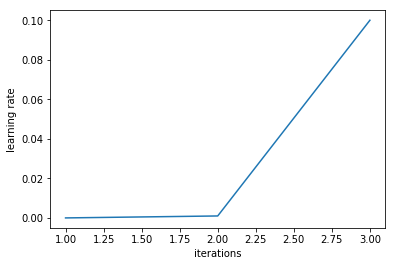

In [14]:
learn.sched.plot_lr()

In [15]:
learn.fit(1e-2, 4)

epoch      trn_loss   val_loss   accuracy   
    0      0.299454   0.298664   0.921053  
    1      0.281537   0.264465   0.947368  
    2      0.235535   0.228606   0.947368  
    3      0.206254   0.208927   0.894737  



[0.20892730355262756, 0.8947368264198303]

In [16]:
learn.precompute=False

In [17]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                
    0      0.128275   0.209468   0.894737  
    1      0.132152   0.206967   0.894737                
    2      0.132455   0.203944   0.921053                



[0.20394375920295715, 0.9210526347160339]

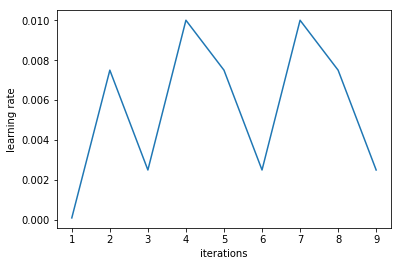

In [18]:
learn.sched.plot_lr()

In [19]:
learn.save('224_lastlayer')

In [20]:
learn.load('224_lastlayer')

In [21]:
learn.unfreeze()

In [22]:
lr=np.array([1e-4,1e-3,1e-2])

In [23]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                
    0      0.227256   0.212657   0.921053  
    1      0.286314   0.22635    0.947368                
    2      0.237661   0.232551   0.868421                
    3      0.214792   0.214944   0.894737                
    4      0.194447   0.221618   0.921053                
    5      0.183218   0.235814   0.894737                
    6      0.168745   0.236215   0.921053                



[0.23621539771556854, 0.9210526347160339]

In [24]:
learn.save('224_all')

In [25]:
learn.load('224_all')

In [29]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy = accuracy_np(probs, y)

In [30]:
print(f"MODEL ACCURACY: {accuracy}")

MODEL ACCURACY: 0.9210526315789473


[[18  1]
 [ 2 17]]


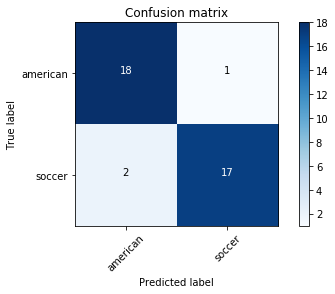

In [36]:
from sklearn.metrics import confusion_matrix
preds = np.argmax(probs, axis=1)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

FROM HERE: PRINT OUTPUT

In [37]:
log_preds = learn.predict(data.test_dl)
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
CLASS_PREDICTION = data.classes[int(preds)]

In [39]:
print(f'YOUR IMAGE IS: {CLASS_PREDICTION}')

YOUR IMAGE IS: american


In [40]:
probs_american = np.exp(log_preds[:, 0])      #pr(american)
probs_soccer = np.exp(log_preds[:,1])        # pr(soccer)

In [41]:
print(f'AMERICAN FOOTBALL POSSIBILITY: {probs_american}')
print(f'SOCCER POSSIBILITY: {probs_soccer}')

AMERICAN FOOTBALL POSSIBILITY: [0.98536]
SOCCER POSSIBILITY: [0.01464]
